## Data quality check / cleaning / preparation 
*By John Olsen*

In [3]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

In [4]:
# Reading in data
dashboard_2015 = pd.read_csv(r'./Datasets/2015 Dashboard.csv')
batted_ball_2015 = pd.read_csv(r'./Datasets/2015 Batted Ball.csv')
statcast_2015 = pd.read_csv(r'./Datasets/2015 Statcast.csv')
dashboard_2016 = pd.read_csv(r'./Datasets/2016 Dashboard.csv')
batted_ball_2016 = pd.read_csv(r'./Datasets/2016 Batted Ball.csv')
statcast_2016 = pd.read_csv(r'./Datasets/2016 Statcast.csv')
dashboard_2017 = pd.read_csv(r'./Datasets/2017 Dashboard.csv')
batted_ball_2017 = pd.read_csv(r'./Datasets/2017 Batted Ball.csv')
statcast_2017 = pd.read_csv(r'./Datasets/2017 Statcast.csv')
dashboard_2018 = pd.read_csv(r'./Datasets/2018 Dashboard.csv')
batted_ball_2018 = pd.read_csv(r'./Datasets/2018 Batted Ball.csv')
statcast_2018 = pd.read_csv(r'./Datasets/2018 Statcast.csv')
dashboard_2019 = pd.read_csv(r'./Datasets/2019 Dashboard.csv')
batted_ball_2019 = pd.read_csv(r'./Datasets/2019 Batted Ball.csv')
statcast_2019 = pd.read_csv(r'./Datasets/2019 Statcast.csv')
dashboard_2020 = pd.read_csv(r'./Datasets/2020 Dashboard.csv')
batted_ball_2020 = pd.read_csv(r'./Datasets/2020 Batted Ball.csv')
statcast_2020 = pd.read_csv(r'./Datasets/2020 Statcast.csv')
dashboard_2021 = pd.read_csv(r'./Datasets/2021 Dashboard.csv')
batted_ball_2021 = pd.read_csv(r'./Datasets/2021 Batted Ball.csv')
statcast_2021 = pd.read_csv(r'./Datasets/2021 Statcast.csv')
dashboard_2022 = pd.read_csv(r'./Datasets/2022 Dashboard.csv')
batted_ball_2022 = pd.read_csv(r'./Datasets/2022 Batted Ball.csv')
statcast_2022 = pd.read_csv(r'./Datasets/2022 Statcast.csv')

### Creating Train and Test Datasets + Response Variable

After reading in all the datasets, there were quite a few steps to go through.
1. Merging the yearly datsets together by `player_id`, subsetting them for just the important variables in the process
2. Create the response variable of `Next_year_HR` using the following year's dataset and merging that column with the current year dataframe
3. Divided the yearly frames into 80% train and 20% test using a random sample with a set seed
4. Concatenate the yearly train dataframes together and the yearly test dataframes together to create overall train and test dataframes
5. Renamed columns with % and / signs in them so there aren't issues with syntax and running code
6. Converting any of the rate predictors to numeric as they originally had % symbols in each value

In [5]:
# Take selected variables from each of the three datasets for each year
dashboard_2015_merge = dashboard_2015.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2015_merge = batted_ball_2015.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2015_merge = statcast_2015.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

# Merging these selected variables into one dataset
temp_frame_2015 = pd.merge(dashboard_2015_merge, batted_ball_2015_merge, on = 'playerid')
temp_frame_2015_2 = pd.merge(temp_frame_2015, statcast_2015_merge, on = 'playerid')

# Adding a Year column so we can tell the seasons apart of players who have multiple years in the dataset
temp_frame_2015_2['Year'] = 2015

# Creatiing response using the next season's data
next_season_hr_2015 = dashboard_2016.loc[:, ['HR', 'playerid']]
next_season_hr_2015 = next_season_hr_2015.rename(columns = {'HR':'Next_Year_HR'})

# Merging response column and yearly dataset together for the overall year dataset
frame_2015 = pd.merge(temp_frame_2015_2, next_season_hr_2015, on = 'playerid')

# Finding what 80% of the dataset observations is equal to for randomly sampling 80$ for training set
frame_2015.shape[0]*0.8

216.8

In [6]:
# Randomly sampling 80% of data with a set seed for train data
train_2015 = frame_2015.sample(n = 217, random_state = 1)

# Creating test set by dropping duplicate observations in train set
temp_df = frame_2015.merge(train_2015.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2015 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2015 = test_2015.drop('_merge', axis = 1)

In [7]:
# Same process for 2016
dashboard_2016_merge = dashboard_2016.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2016_merge = batted_ball_2016.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2016_merge = statcast_2016.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2016 = pd.merge(dashboard_2016_merge, batted_ball_2016_merge, on = 'playerid')
temp_frame_2016_2 = pd.merge(temp_frame_2016, statcast_2016_merge, on = 'playerid')

temp_frame_2016_2['Year'] = 2016

next_season_hr_2016 = dashboard_2017.loc[:, ['HR', 'playerid']]
next_season_hr_2016 = next_season_hr_2016.rename(columns = {'HR':'Next_Year_HR'})

frame_2016 = pd.merge(temp_frame_2016_2, next_season_hr_2016, on = 'playerid')

frame_2016.shape[0]*0.8

208.8

In [8]:
train_2016 = frame_2016.sample(n = 219, random_state = 1)
temp_df = frame_2016.merge(train_2016.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2016 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2016 = test_2016.drop('_merge', axis = 1)

In [9]:
# Same process for 2017
dashboard_2017_merge = dashboard_2017.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2017_merge = batted_ball_2017.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2017_merge = statcast_2017.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2017 = pd.merge(dashboard_2017_merge, batted_ball_2017_merge, on = 'playerid')
temp_frame_2017_2 = pd.merge(temp_frame_2017, statcast_2017_merge, on = 'playerid')

temp_frame_2017_2['Year'] = 2017

next_season_hr_2017 = dashboard_2018.loc[:, ['HR', 'playerid']]
next_season_hr_2017 = next_season_hr_2017.rename(columns = {'HR':'Next_Year_HR'})

frame_2017 = pd.merge(temp_frame_2017_2, next_season_hr_2017, on = 'playerid')

frame_2017.shape[0]*0.8

221.60000000000002

In [10]:
train_2017 = frame_2017.sample(n = 222, random_state = 1)
temp_df = frame_2017.merge(train_2017.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2017 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2017 = test_2017.drop('_merge', axis = 1)

In [11]:
# Same process for 2018
dashboard_2018_merge = dashboard_2018.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2018_merge = batted_ball_2018.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2018_merge = statcast_2018.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2018 = pd.merge(dashboard_2018_merge, batted_ball_2018_merge, on = 'playerid')
temp_frame_2018_2 = pd.merge(temp_frame_2018, statcast_2018_merge, on = 'playerid')

temp_frame_2018_2['Year'] = 2018

next_season_hr_2018 = dashboard_2019.loc[:, ['HR', 'playerid']]
next_season_hr_2018 = next_season_hr_2018.rename(columns = {'HR':'Next_Year_HR'})

frame_2018 = pd.merge(temp_frame_2018_2, next_season_hr_2018, on = 'playerid')

frame_2018.shape[0]*0.8

209.60000000000002

In [12]:
train_2018 = frame_2018.sample(n = 210, random_state = 1)
temp_df = frame_2018.merge(train_2018.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2018 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2018 = test_2018.drop('_merge', axis = 1)

In [13]:
# Same process for 2019
dashboard_2019_merge = dashboard_2019.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2019_merge = batted_ball_2019.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2019_merge = statcast_2019.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2019 = pd.merge(dashboard_2019_merge, batted_ball_2019_merge, on = 'playerid')
temp_frame_2019_2 = pd.merge(temp_frame_2019, statcast_2019_merge, on = 'playerid')

temp_frame_2019_2['Year'] = 2019

next_season_hr_2019 = dashboard_2020.loc[:, ['HR', 'playerid']]
next_season_hr_2019['HR'] = next_season_hr_2019['HR'].apply(lambda x: int((162/60)*x))
next_season_hr_2019 = next_season_hr_2019.rename(columns = {'HR':'Next_Year_HR'})

frame_2019 = pd.merge(temp_frame_2019_2, next_season_hr_2019, on = 'playerid')

frame_2019.shape[0]*0.8

225.60000000000002

In [14]:
train_2019 = frame_2019.sample(n = 226, random_state = 1)
temp_df = frame_2019.merge(train_2019.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2019 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2019 = test_2019.drop('_merge', axis = 1)

In [15]:
# Same process for 2020, except all counting stats are scaled by a factor of 162/60 to account for
# the shortened season due to the pandemic
dashboard_2020_merge = dashboard_2020.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
dashboard_2020_merge['G'] = dashboard_2020_merge['G'].apply(lambda x: int((162/60) * x))
dashboard_2020_merge['PA'] = dashboard_2020_merge['PA'].apply(lambda x: int((162/60) * x))
dashboard_2020_merge['HR'] = dashboard_2020_merge['HR'].apply(lambda x: int((162/60) * x))
batted_ball_2020_merge = batted_ball_2020.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2020_merge = statcast_2020.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2020 = pd.merge(dashboard_2020_merge, batted_ball_2020_merge, on = 'playerid')
temp_frame_2020_2 = pd.merge(temp_frame_2020, statcast_2020_merge, on = 'playerid')

temp_frame_2020_2['Year'] = 2020

next_season_hr_2020 = dashboard_2021.loc[:, ['HR', 'playerid']]
next_season_hr_2020 = next_season_hr_2020.rename(columns = {'HR':'Next_Year_HR'})

frame_2020 = pd.merge(temp_frame_2020_2, next_season_hr_2020, on = 'playerid')

frame_2020.shape[0]*0.8

216.8

In [16]:
train_2020 = frame_2020.sample(n = 217, random_state = 1)
temp_df = frame_2020.merge(train_2020.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2020 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2020 = test_2020.drop('_merge', axis = 1)

In [17]:
# Same process for 2021
dashboard_2021_merge = dashboard_2021.loc[:, ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid']]
batted_ball_2021_merge = batted_ball_2021.loc[:, ['LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'playerid']]
statcast_2021_merge = statcast_2021.loc[:, ['EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'playerid']]

temp_frame_2021 = pd.merge(dashboard_2021_merge, batted_ball_2021_merge, on = 'playerid')
temp_frame_2021_2 = pd.merge(temp_frame_2021, statcast_2021_merge, on = 'playerid')

temp_frame_2021_2['Year'] = 2021

next_season_hr_2021 = dashboard_2022.loc[:, ['HR', 'playerid']]
next_season_hr_2021 = next_season_hr_2021.rename(columns = {'HR':'Next_Year_HR'})

frame_2021 = pd.merge(temp_frame_2021_2, next_season_hr_2021, on = 'playerid')

frame_2021.shape[0]*0.8

213.60000000000002

In [18]:
train_2021 = frame_2021.sample(n = 214, random_state = 1)
temp_df = frame_2021.merge(train_2021.drop_duplicates(), on = ['Name', 'G', 'PA', 'HR', 'BB%', 'K%', 'playerid', 'LD%', 'GB%', 'FB%',
       'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'EV', 'maxEV', 'LA',
       'Barrel%', 'HardHit%', 'Year', 'Next_Year_HR'], how = 'left', indicator = True)
test_2021 = temp_df.loc[temp_df['_merge'] == 'left_only', :]
test_2021 = test_2021.drop('_merge', axis = 1)

In [19]:
# Concatenating the train datasets together
train = pd.concat([train_2015, train_2016, train_2017, train_2018, train_2019, train_2020, train_2021])

# Renaming all columns with characters that would otherwise be problematic
train = train.rename(columns = {'Barrel%': 'Barrel', 'HardHit%': 'HardHit', 'HR/FB': 'HRperFB', 'BB%':'BB', 'K%':'K', 'FB%':'FB', 'Pull%':'Pull', 'GB%':'GB', 'LD%':'LD','IFFB%':'IFFB', 'Cent%':'Cent', 'Oppo%':'Oppo'})

In [20]:
# Concatenating the test datasets together
test = pd.concat([test_2015, test_2016, test_2017, test_2018, test_2019, test_2020, test_2021])

# Renaming all columns with characters that would otherwise be problematic
test = test.rename(columns = {'Barrel%': 'Barrel', 'HardHit%': 'HardHit', 'HR/FB': 'HRperFB', 'BB%':'BB', 'K%':'K', 'FB%':'FB', 'Pull%':'Pull', 'GB%':'GB', 'LD%':'LD','IFFB%':'IFFB', 'Cent%':'Cent', 'Oppo%':'Oppo'})

In [21]:
# Defining a function to remove percentage symbols from observation values that have them
def remove_percentage_sign(variable):
    if variable.dtypes == 'O':
        variable = variable.str.replace('%', '')
        variable = pd.to_numeric(variable, errors = 'coerce')
    return variable

In [22]:
# Running the function on the train and test sets
train.loc[:, 'G':] = train.loc[:, 'G':].apply(remove_percentage_sign)
test.loc[:, 'G':] = test.loc[:, 'G':].apply(remove_percentage_sign)

In [23]:
# Resetting the indexes on the train set so there aren't problems with removing influential points
train = train.reset_index().drop('index', axis = 1)

### Data quality check

In [24]:
# All variables are quantitative
train.describe()

,G,PA,HR,BB,K,playerid,LD,GB,FB,IFFB,...,Pull,Cent,Oppo,EV,maxEV,LA,Barrel,HardHit,Year,Next_Year_HR
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,...,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,123.577049,479.768525,16.682623,8.766230,21.028656,10708.931803,21.269180,42.998230,35.733377,9.245049,...,40.504459,34.593639,24.904984,88.652721,110.459803,12.411672,6.920328,36.807148,2017.994098,16.565246
std,28.389748,143.388674,10.393075,3.286636,6.047531,4949.608521,3.279545,6.904258,6.898324,4.614579,...,5.898777,3.650329,4.321715,2.233904,3.266471,4.560382,4.172135,8.036217,1.995886,10.640103
min,46.000000,189.000000,0.000000,1.500000,5.300000,393.000000,10.300000,21.100000,11.300000,0.000000,...,18.800000,21.800000,13.000000,80.500000,99.800000,-7.900000,0.000000,8.500000,2015.000000,0.000000
25%,103.000000,367.000000,9.000000,6.400000,16.700000,6368.000000,19.100000,38.200000,30.800000,6.100000,...,36.800000,32.200000,21.900000,87.200000,108.300000,9.400000,3.700000,31.900000,2016.000000,8.000000
50%,129.000000,491.000000,15.000000,8.500000,20.900000,11038.000000,21.100000,42.900000,36.000000,9.000000,...,40.400000,34.600000,24.700000,88.700000,110.300000,12.400000,6.400000,37.400000,2018.000000,14.000000
75%,148.000000,604.000000,23.000000,10.700000,24.900000,14162.000000,23.400000,47.800000,40.600000,12.000000,...,44.300000,36.900000,27.700000,90.100000,112.700000,15.500000,9.500000,42.200000,2020.000000,23.000000
max,164.000000,747.000000,59.000000,23.200000,44.000000,26197.000000,35.700000,67.400000,60.500000,28.000000,...,60.300000,50.000000,43.400000,96.000000,122.200000,27.000000,25.600000,62.200000,2021.000000,62.000000


In [25]:
test.describe()

,G,PA,HR,BB,K,playerid,LD,GB,FB,IFFB,...,Pull,Cent,Oppo,EV,maxEV,LA,Barrel,HardHit,Year,Next_Year_HR
count,366.000000,366.00000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,123.543716,478.34153,17.683060,8.820765,21.877869,10994.234973,21.168579,42.774317,36.055738,9.451366,...,40.816940,34.679508,24.503552,88.931694,110.963115,12.593989,7.377869,37.843443,2018.060109,16.054645
std,29.177717,149.15784,10.879821,3.330828,6.151305,5129.126851,3.416081,6.707052,6.671223,4.443951,...,5.929516,3.607138,4.276109,2.174770,3.262091,4.453974,3.993512,7.646140,1.997723,9.985045
min,45.000000,189.00000,0.000000,2.000000,7.400000,785.000000,13.300000,23.700000,18.200000,0.000000,...,21.600000,24.100000,11.000000,82.200000,101.400000,1.800000,0.000000,13.000000,2015.000000,0.000000
25%,102.000000,345.00000,9.000000,6.500000,17.100000,6427.000000,18.925000,38.000000,31.800000,6.300000,...,36.800000,32.400000,21.700000,87.400000,108.800000,9.600000,4.725000,32.925000,2016.000000,8.250000
50%,130.000000,499.00000,15.500000,8.400000,22.200000,11483.000000,20.900000,42.550000,35.550000,9.100000,...,40.750000,34.700000,24.300000,89.000000,110.800000,12.550000,6.950000,37.950000,2018.000000,14.000000
75%,148.000000,606.00000,25.000000,10.675000,26.175000,14731.500000,23.300000,47.500000,40.700000,12.100000,...,44.700000,36.900000,27.400000,90.300000,113.300000,15.500000,9.600000,43.075000,2020.000000,23.000000
max,162.000000,735.00000,59.000000,20.900000,45.700000,27506.000000,38.700000,60.800000,53.500000,25.000000,...,61.100000,44.800000,38.300000,96.100000,122.200000,24.800000,23.500000,55.900000,2021.000000,48.000000


### Data preparation


For eventual Lasso regression, I created standardized versions of the train and test datasets.

In [26]:
# Standardized train
y = train['Next_Year_HR']
X = train.iloc[:,[1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19]]
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

In [27]:
# Standardized test
Xtest = test.iloc[:,[1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19]]
Xtest_std = scaler.transform(Xtest)

## Exploratory data analysis

## Developing the model

In [29]:
# Using six most correlated variables plus a quadratic term based on EDA
model = smf.ols(formula = 'Next_Year_HR~HR+Barrel+EV+HardHit+maxEV+HRperFB+I(HardHit**2)', data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Next_Year_HR   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     142.2
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          2.95e-161
Time:                        22:35:03   Log-Likelihood:                -5384.7
No. Observations:                1525   AIC:                         1.079e+04
Df Residuals:                    1517   BIC:                         1.083e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -128.5473     20.994     -6.123      0.000    -169.728     -87.367
HR                  0.4451      0.032     14.108      0.000       0.383       0.507
Barrel              0.3925      0.112      3.510      0.000       0.173       0.612
EV                  0.9160      0.248      3.690      0.000       0.429       1.403
HardHit             0.3219      0.169      1.901      0.057      -0.010       0.654
maxEV               0.4818      0.091      5.287      0.000       0.303       0.661
HRperFB            -0.2315      0.060     -3.834      0.000      -0.350      -0.113
I(HardHit ** 2)    -0.0057      0.002     -2.408      0.016      -0.010      -0.001
==============================================================================
Omnibus:                       78.420   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.461
Skew:                           0.532   Prob(JB):                     5.07e-21
Kurtosis:                       3.581   Cond. No.                     1.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# Checking train RSE and test RMSE
rse = np.sqrt(model.mse_resid)
print(rse)

pred = model.predict(test)
rmse = mean_squared_error(test['Next_Year_HR'], pred, squared = False)
print(rmse)

8.28670207219361
8.18056493816145


Text(0, 0.5, 'Residuals')

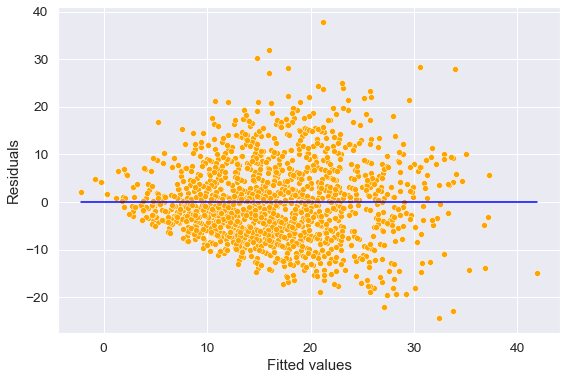

In [31]:
# Checking residual plot for any linear model assumption violations and influential points
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [model.fittedvalues.min(), model.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [32]:
# Finding outliers
out = model.outlier_test()

# Finding high leverage points
influence = model.get_influence()
leverage = influence.hat_matrix_diag
average_leverage = (model.df_model+1)/model.nobs
high_leverage_threshold = 4*average_leverage

# Using outliers and high leverage points to filter out influential points
train_filtered = train.drop(np.intersect1d(np.where(np.abs(out.student_resid)>3)[0],
                                           (np.where(leverage>high_leverage_threshold)[0])))

# Number of influential points
train.shape[0]-train_filtered.shape[0]

1

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.